# 0.4 Train SVM model

In [126]:
%matplotlib inline

In [127]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [128]:
import numpy as np
import pandas as pd
import os
import string
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import src.features.build_features as bf

In [129]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [130]:
dataset = pd.read_csv("data/features_resolut_200_new_seg.csv")

In [131]:
X = dataset.iloc[:, 2:]
X.head(5)

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,8528.5,4800.5,3,549.286358,77,129,0.596899,1.164683,35.377323,11.143850,13.037575,7.259825,21.846661,25.389368,14.440388,578.206775,0.956442,2.465545
1,9953.0,5676.5,2,508.114785,112,112,1.000000,1.260324,25.939981,14.413100,16.805250,8.528275,25.508927,29.680633,15.348275,540.818174,0.961102,2.643629
2,7509.0,3258.5,3,224.894442,65,66,0.984848,0.571314,6.735585,10.984475,12.646750,6.974575,23.604499,26.912500,15.163098,484.707370,0.956684,2.164022
3,9115.5,4469.0,3,268.793937,67,94,0.712766,0.690911,7.926080,13.150100,15.252000,7.582700,24.581632,28.391941,14.352582,400.247040,0.969716,2.292049
4,12326.0,7521.0,2,348.818322,104,105,0.990476,0.885932,9.871347,17.070475,19.693600,10.969550,25.956616,29.765642,17.022794,457.133220,0.972591,3.118037


In [132]:
y = dataset.iloc[:,1]
y.head(5)

0    9
1    9
2    9
3    9
4    9
Name: label, dtype: int64

## Cross validational split

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 140)

In [135]:
from sklearn import preprocessing

In [136]:
X_train_std = (X_train - X_train.mean()) / X_train.std()
X_test_std = (X_test - X_train.mean()) / X_train.std()
#scaler = preprocessing.MinMaxScaler()
#X_train_std = scaler.fit_transform(X_train)
#X_test_std = scaler.transform(X_test)

In [137]:
X_train_std

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
3824,1.080982,-0.008453,0.345074,-0.888484,-0.898676,-0.652071,-0.367692,-0.787769,-0.726470,1.137313,1.193743,1.180501,0.959013,1.028865,0.933219,-0.235088,0.568130,0.844629
3192,-0.716226,-0.452054,-0.596938,-0.127352,1.000275,-0.417255,0.515994,0.360876,-0.069181,-0.722887,-0.811194,-0.184582,-0.439682,-0.688231,0.784725,-0.756746,0.361494,-0.751120
3332,-1.246225,-1.081693,0.345074,-0.208484,-0.958018,0.561146,-0.781002,0.848846,0.567556,-1.306634,-1.311437,-0.960509,-1.531276,-1.535831,-0.454974,0.093062,-0.836304,-1.264351
3913,0.662285,-0.245709,0.345074,-0.952060,-0.898676,-0.828183,-0.266926,-0.773053,-0.723103,0.699346,0.761219,0.160990,0.729134,0.834168,-0.110675,-0.453315,0.582620,0.401108
2790,-0.952305,-1.052021,0.345074,-1.233424,-2.026178,-0.867320,-0.982118,-0.761100,-0.670934,-1.064683,-1.117831,-0.990711,-1.182179,-1.313505,-1.235086,-0.880365,0.364792,-1.121761
1421,-1.299348,-1.037806,-0.596938,0.474481,0.584879,1.285163,-0.439216,3.827256,2.179896,-1.356033,-1.357706,-1.291886,-1.583710,-1.585023,-1.591031,0.411292,-1.505335,-1.362657
1571,-1.535988,-1.377277,0.345074,-0.794480,0.031019,-1.415224,1.166362,1.529712,0.566426,-1.478012,-1.486146,-1.354715,-1.781777,-1.852463,-1.476643,0.162019,-2.741241,-1.561144
983,-0.556632,-0.291739,-0.596938,0.047840,1.158521,-1.141272,1.570723,-0.172902,-0.036976,-0.511127,-0.470733,-0.898584,-0.162217,-0.033213,-1.302693,-0.469416,0.283906,-0.590844
3234,-1.382346,-1.121179,-0.596938,-0.462410,-0.443719,0.130650,-0.469227,1.828619,0.553174,-1.396997,-1.375705,-1.114037,-1.801285,-1.696571,-0.908806,-0.327207,-0.617671,-1.392470
1534,-0.087394,0.179615,-0.596938,1.314916,1.296986,1.285163,-0.228809,0.627765,0.687503,-0.001501,-0.116754,-0.096026,0.388578,0.168851,0.204841,0.451403,0.179784,0.165171


## Applying SVM classifier model

In [138]:
from sklearn import svm

In [224]:
clf = svm.SVC(kernel='rbf', C=750, decision_function_shape='ovo', gamma=0.01)
clf.fit(X_train_std, y_train)

SVC(C=750, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [225]:
y_pred = clf.predict(X_test_std)

In [226]:
from sklearn import metrics

In [227]:
metrics.f1_score(y_test, y_pred, average='micro')

0.8519298245614035

In [228]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       122
           1       0.87      0.89      0.88       169
           2       0.78      0.88      0.83       154
           3       0.92      0.90      0.91       115
           4       0.93      0.99      0.96       156
           5       0.90      0.82      0.85        65
           6       0.79      0.69      0.74        78
           7       0.85      0.90      0.87        68
           8       0.95      0.92      0.94       172
           9       0.90      0.79      0.84        82
          10       0.74      0.83      0.78       171
          11       0.53      0.37      0.44        73

   micro avg       0.85      0.85      0.85      1425
   macro avg       0.84      0.82      0.83      1425
weighted avg       0.85      0.85      0.85      1425



## GridSearch

In [93]:
def gridSearch(DataSet, LabelSet):
    #define logspace/interval from which c and gamma valuest are computed and saved to a dictionary to be passed as a parameter
    #c from 1e-2 to 1e5
    C_range = np.logspace(-1, 5, 6)
    #gamma from 1e-5 to 1e3
    gamma_range = np.logspace(-1, 5, 6)
    param_grid = dict(gamma=gamma_range, C=C_range)
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
    grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, n_jobs=1)
    grid.fit(DataSet, LabelSet)
    
    return grid

In [94]:
svm_grid = gridSearch(X_train_std, y_train)

In [95]:
y_pred_svm_grid = svm_grid.predict(X_test_std)

In [96]:
metrics.f1_score(y_test, y_pred_svm_grid, average='micro')

0.7835558678847505

In [97]:
svm_grid.best_params_

{'C': 25.118864315095795, 'gamma': 0.1}

## Save model

In [229]:
import pickle

In [230]:
# save the classifier
with open('/Users/anacriel/plant_seed_classification/models/svm_0_85.pkl', 'wb') as fid:
    pickle.dump(clf, fid) 

## Checking test images

In [231]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [232]:
import src.visualization.visualize as vs
import src.features.build_features as bfeatures
import cv2
import mahotas as mt
from matplotlib import pyplot as plt
from src.data.make_dataset import create_dataset_added_features

In [233]:
data_dir = '../data/raw/'
test_image_dir = os.path.join(data_dir, 'test')

In [234]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [235]:
images, titles = vs.read_images(test_image_dir, data_type='test')

794


In [236]:
features_of_img = create_dataset_added_features(images, titles, kind='title')

In [237]:
features_of_img.drop(columns='title', inplace=True)

In [238]:
features_of_img

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,11101.0,11101.0,1,930.749341,189,178,1.061798,3.030538,78.037504,18.533575,21.724200,7.983625,30.451446,35.577191,13.809316,587.534112,0.957005,2.855530
0,1785.5,951.5,2,371.119838,59,105,0.561905,3.469616,77.138020,3.543925,3.597800,2.082950,15.583402,15.677783,9.369265,512.572719,0.850819,0.827081
0,10392.0,10392.0,1,537.872145,186,97,1.917526,1.736143,27.839342,17.978925,21.675775,8.015200,30.686923,36.972896,14.168467,339.347348,0.973132,2.717592
0,6421.5,6421.5,1,529.369619,138,189,0.730159,4.061668,43.639678,11.148475,13.114025,5.761100,25.922983,30.473634,14.097589,316.997057,0.963861,1.853794
0,16788.5,16788.5,1,969.761534,189,191,0.989529,2.150222,56.016763,24.371000,30.025950,13.734150,29.131586,35.783715,17.512366,623.893901,0.965024,3.872032
0,1925.5,1925.5,1,517.428493,200,105,1.904762,10.906258,139.045570,3.730525,3.908100,2.315175,15.650866,16.339462,9.778977,371.915657,0.896006,0.763760
0,15578.5,15578.5,1,526.801077,196,113,1.734513,1.421703,17.814255,26.479500,30.549650,10.693475,33.689234,38.648966,14.828023,290.272401,0.982241,3.542150
0,7446.0,5718.5,2,1060.271201,141,191,0.738220,3.616841,150.977037,13.230575,14.759900,6.435000,28.586241,31.728051,14.737346,856.777087,0.911633,2.327025
0,8025.5,8025.5,1,669.653889,158,190,0.831579,3.740577,55.876435,14.509425,16.467925,4.414900,29.443423,33.392526,10.261431,407.932796,0.961292,2.238430
0,555.0,555.0,1,273.989895,102,78,1.307692,14.335135,135.262095,1.070825,1.057150,0.629500,8.719355,8.559982,5.151144,204.896315,0.804789,0.262916


In [239]:
features_of_img = (features_of_img - X_train.mean()) / X_train.std()
#features_of_img = scaler.transform(features_of_img)

In [240]:
y_test_pred = clf.predict(features_of_img)

In [241]:
y_test_pred[0]

6

In [242]:
len(titles)

794

In [243]:
len(features_of_img)

794

In [244]:
cols = {'file':titles, 'species':y_test_pred}

In [245]:
submission_df = pd.DataFrame(data=cols)

In [246]:
submission_df.iloc[520]

file       e721c6ac8.png
species               10
Name: 520, dtype: object

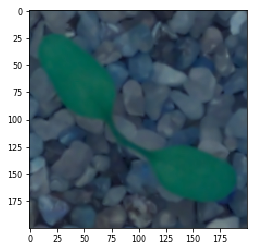

In [247]:
plt.imshow(images[791])

In [248]:
features_of_img

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,0.730009,1.000707,-0.596938,1.047929,1.0794,0.854666,-0.156572,-0.081410,0.034232,0.650882,0.714052,0.535578,0.596022,0.713737,0.304723,0.436168,0.389058,0.637756
0,-1.362467,-1.289391,0.345074,-0.752876,-1.4921,-0.573799,-0.740910,0.052233,0.024385,-1.310114,-1.334027,-1.133090,-1.429140,-1.536671,-0.969275,0.110464,-1.086070,-1.287705
0,0.570751,0.840730,-0.596938,-0.216292,1.02006,-0.730343,0.843712,-0.475389,-0.515274,0.578321,0.708581,0.544507,0.628096,0.871576,0.407775,-0.642194,0.613092,0.506821
0,-0.321115,-0.055159,-0.596938,-0.243652,0.0705801,1.06991,-0.544234,0.232438,-0.342312,-0.315261,-0.258800,-0.092936,-0.020796,0.136580,0.387438,-0.739305,0.484304,-0.313120
0,2.007552,2.284014,-0.596938,1.173464,1.0794,1.10905,-0.241049,-0.349354,-0.206823,1.414553,1.652056,2.161784,0.416245,0.737092,1.367250,0.594150,0.500461,1.602649
0,-1.331020,-1.069621,-0.596938,-0.282077,1.29699,-0.573799,0.828792,2.315744,0.702071,-1.285702,-1.298966,-1.067419,-1.419951,-1.461842,-0.851715,-0.500686,-0.458334,-1.347811
0,1.735759,2.010994,-0.596938,-0.251917,1.21786,-0.417255,0.629783,-0.571096,-0.625016,1.690394,1.711229,1.301904,1.037038,1.061121,0.597023,-0.855423,0.739630,1.289515
0,-0.090988,-0.213782,0.345074,1.464711,0.129922,1.10905,-0.534811,0.097045,0.832681,-0.042874,-0.072835,0.097638,0.341964,0.278441,0.571005,1.606019,-0.241240,0.136084
0,0.039181,0.306762,-0.596938,0.207762,0.466195,1.08948,-0.425681,0.134706,-0.208360,0.124430,0.120152,-0.473632,0.458720,0.466675,-0.713283,-0.344193,0.448616,0.051987
0,-1.638866,-1.378856,-0.596938,-1.065426,-0.641527,-1.10214,0.130861,3.359401,0.660654,-1.633653,-1.621091,-1.544115,-2.364086,-2.341617,-2.179593,-1.226379,-1.725522,-1.823227


In [249]:
submission_df

,file,species
0,1b490196c.png,6
1,85431c075.png,10
2,506347cfe.png,2
3,7f46a71db.png,0
4,668c1007c.png,3
5,71f5323c5.png,10
6,1f3f44563.png,4
7,beebe5f4e.png,2
8,780defa2e.png,8
9,df521c0c0.png,10


In [250]:
submission_df.to_csv("data/9th_submission.csv")

In [251]:
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }

In [252]:
mapping_rev = {v : k for k, v in mapping.items()}

In [253]:
mapping_rev

{0: 'Sugar beet',
 1: 'Fat Hen',
 2: 'Scentless Mayweed',
 3: 'Charlock',
 4: 'Small-flowered Cranesbill',
 5: 'Maize',
 6: 'Shepherds Purse',
 7: 'Common wheat',
 8: 'Common Chickweed',
 9: 'Cleavers',
 10: 'Loose Silky-bent',
 11: 'Black-grass'}

In [254]:
submission_df.species.replace(mapping_rev, inplace=True); submission_df

,file,species
0,1b490196c.png,Shepherds Purse
1,85431c075.png,Loose Silky-bent
2,506347cfe.png,Scentless Mayweed
3,7f46a71db.png,Sugar beet
4,668c1007c.png,Charlock
5,71f5323c5.png,Loose Silky-bent
6,1f3f44563.png,Small-flowered Cranesbill
7,beebe5f4e.png,Scentless Mayweed
8,780defa2e.png,Common Chickweed
9,df521c0c0.png,Loose Silky-bent


In [255]:
submission_df.to_csv("/Users/anacriel/submission.csv", index=False)